In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('../Data\\raw\manga.csv')
df.head()

,title,synopsis,genres,score,image_url
0,Monster,"Kenzou Tenma, a renowned Japanese neurosurgeon...",Award Winning Drama Mystery,9.16,https://cdn.myanimelist.net/images/manga/3/258...
1,Berserk,"Guts, a former mercenary now known as the Blac...",Action Adventure Award Winning Drama Fantasy H...,9.47,https://cdn.myanimelist.net/images/manga/1/157...
2,20th Century Boys,"As the 20th century approaches its end, people...",Award Winning Drama Mystery Sci-Fi,8.93,https://cdn.myanimelist.net/images/manga/5/260...
3,Yokohama Kaidashi Kikou,In a post-apocalyptic world where an environme...,Award Winning Sci-Fi Slice of Life,8.65,https://cdn.myanimelist.net/images/manga/1/171...
4,Hajime no Ippo,Makunouchi Ippo is a 16-year-old high school s...,Award Winning Sports,8.74,https://cdn.myanimelist.net/images/manga/2/250...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      975 non-null    object 
 1   synopsis   974 non-null    object 
 2   genres     969 non-null    object 
 3   score      944 non-null    float64
 4   image_url  975 non-null    object 
dtypes: float64(1), object(4)
memory usage: 38.2+ KB


In [47]:
df.score.describe()

count    944.000000
mean       7.312828
std        0.599366
min        5.540000
25%        6.910000
50%        7.280000
75%        7.662500
max        9.470000
Name: score, dtype: float64

In [48]:
df['genres'] = df['genres'].str.replace('Award Winning', 'Award_Winning')
df['genres'] = df['genres'].str.replace('Slice of Life', 'Slice_of_Life')

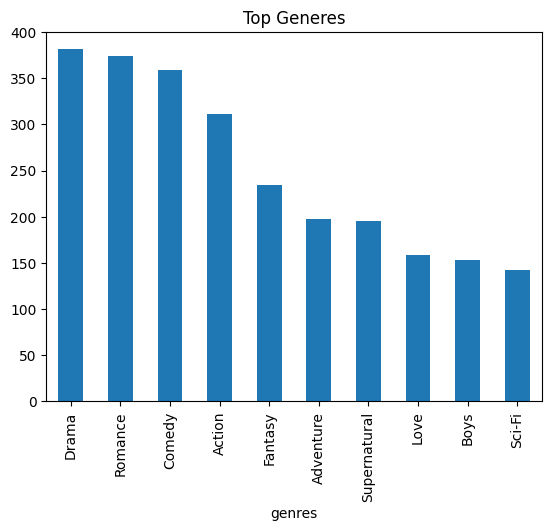

In [49]:
genere_list = df['genres'].str.split().explode()
genere_list.value_counts().head(10).plot(kind = 'bar')
plt.title('Top Generes')
plt.show()


In [50]:
genere_list.unique()

array(['Award_Winning', 'Drama', 'Mystery', 'Action', 'Adventure',
       'Fantasy', 'Horror', 'Sci-Fi', 'Slice_of_Life', 'Sports', 'Comedy',
       'Romance', 'Supernatural', 'Ecchi', 'Suspense', 'Boys', 'Love',
       'Erotica', 'Girls', nan, 'Gourmet', 'Hentai'], dtype=object)

In [51]:
df.dropna(subset=['genres','synopsis'],inplace=True)

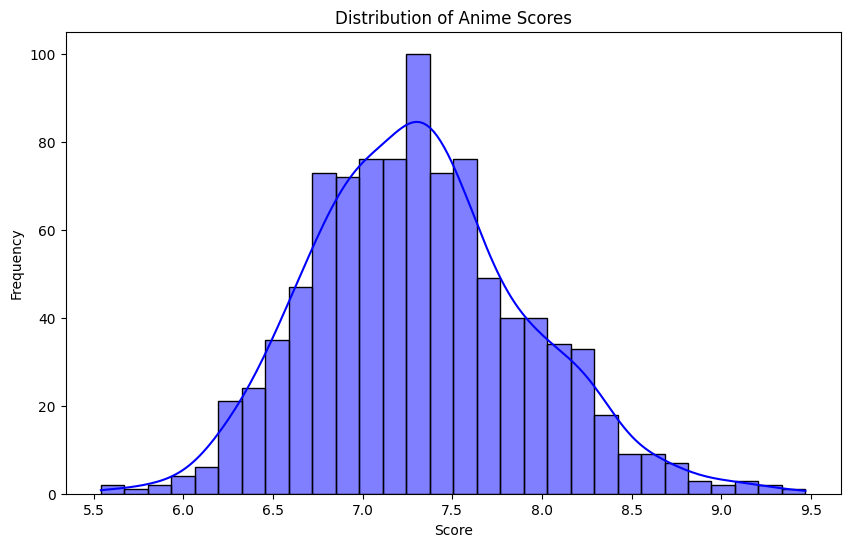

In [52]:
plt.figure(figsize=(10, 6))

# Assuming your score column is named 'score'
sns.histplot(df['score'], kde=True, bins=30, color='blue')
plt.title('Distribution of Anime Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

['Award_Winning' 'Drama' 'Mystery' 'Action' 'Adventure' 'Fantasy' 'Horror'
 'Sci-Fi' 'Slice_of_Life' 'Sports' 'Comedy' 'Romance' 'Supernatural'
 'Ecchi' 'Suspense' 'Boys' 'Love' 'Erotica' 'Girls' nan 'Gourmet' 'Hentai']


C:\Users\Siddh\AppData\Local\Temp\ipykernel_11224\3940688006.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='score', y='genres', data=df_top_genres, order=top_genre_names, palette='rocket')


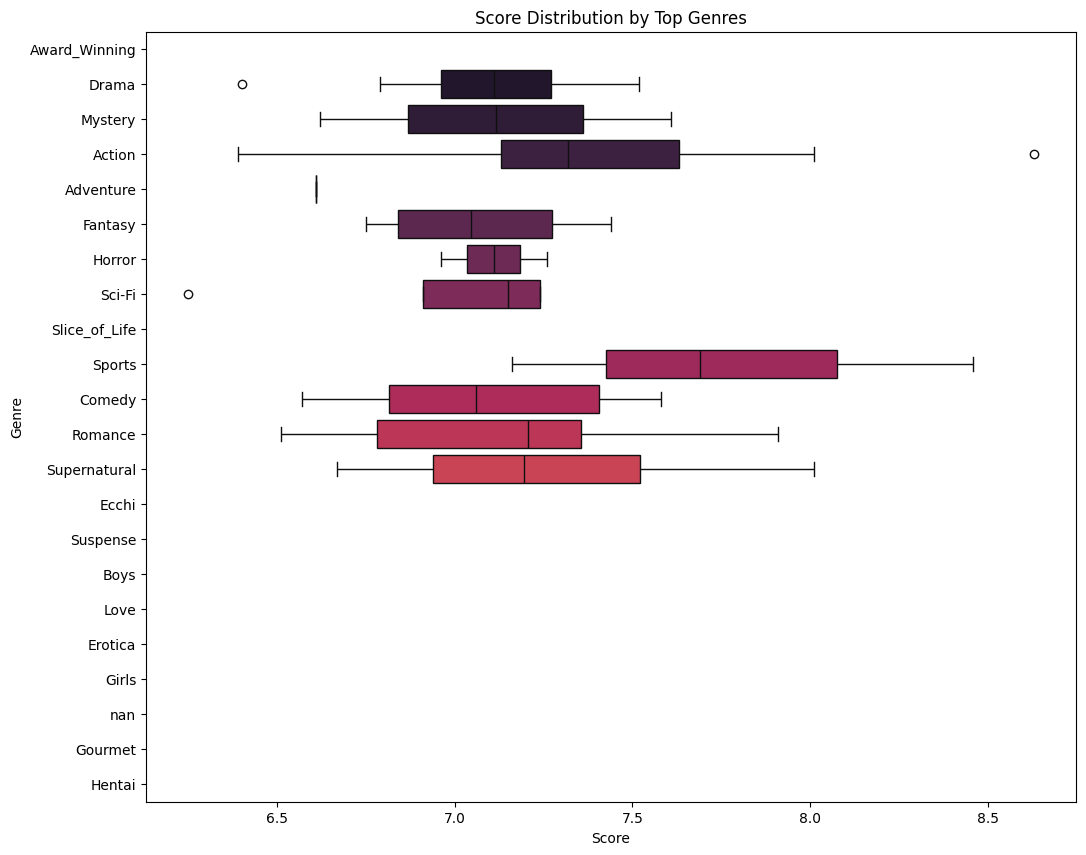

In [53]:
# First, get the names of the top genres to keep the plot clean
top_genre_names = genere_list.unique()

# Explode the genres column to have one genre per row
df_exploded = df.explode('genres')
print(top_genre_names)
# Filter to only include the top genres
df_top_genres = df_exploded[df_exploded['genres'].isin(top_genre_names)]

# Create the box plot
plt.figure(figsize=(12, 10))
sns.boxplot(x='score', y='genres', data=df_top_genres, order=top_genre_names, palette='rocket')
plt.title('Score Distribution by Top Genres')
plt.xlabel('Score')
plt.ylabel('Genre')
plt.show()

In [54]:
unwanted_text = "[Written by MAL Rewrite]"

df['synopsis'] = df['synopsis'].str.removesuffix(unwanted_text).str.strip()

In [55]:
df["score"].fillna(0,inplace=True)

C:\Users\Siddh\AppData\Local\Temp\ipykernel_11224\657500732.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["score"].fillna(0,inplace=True)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 968 entries, 0 to 974
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      968 non-null    object 
 1   synopsis   968 non-null    object 
 2   genres     968 non-null    object 
 3   score      968 non-null    float64
 4   image_url  968 non-null    object 
dtypes: float64(1), object(4)
memory usage: 45.4+ KB


In [57]:
df.to_csv('../Data/Processed/processed_manga.csv',index=False)